In [1]:
# Get filtered PNC timeseries

import pickle

filt = '/home/anton/Documents/Tulane/Research/PNC_Good/PNC_SPM_emoid_good_filt.pkl'

ts = pickle.load(open(filt, 'rb'))

print(list(ts.keys())[0:2])

['600001103037', '600009963128']


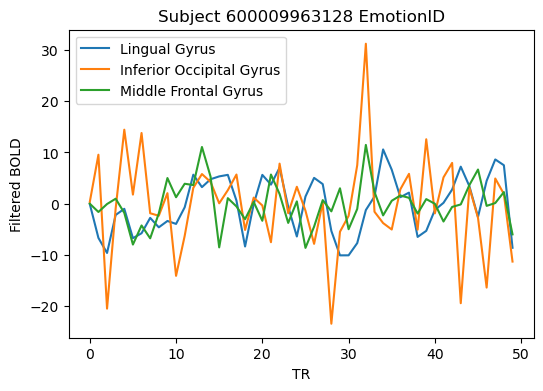

In [2]:
import matplotlib.pyplot as plt

ts1 = ts['600009963128']

fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(ts1[0:3,0:50].T, label=['Lingual Gyrus', 'Inferior Occipital Gyrus', 'Middle Frontal Gyrus'])
ax.legend()
ax.set_title('Subject 600009963128 EmotionID')
ax.set_xlabel('TR')
ax.set_ylabel('Filtered BOLD')
fig.show()
# fig.savefig('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/TS.pdf')

In [3]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


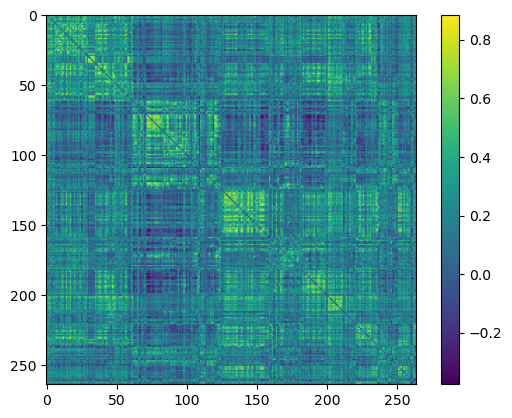

<Figure size 640x480 with 0 Axes>

In [19]:
import numpy as np

p = np.corrcoef(ts1)
idcs = np.arange(264)
p[idcs,idcs] = 0

fig, ax = plt.subplots()

im = ax.imshow(remap(p))
plt.colorbar()
plt.show()
plt.savefig('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/FC.pdf')

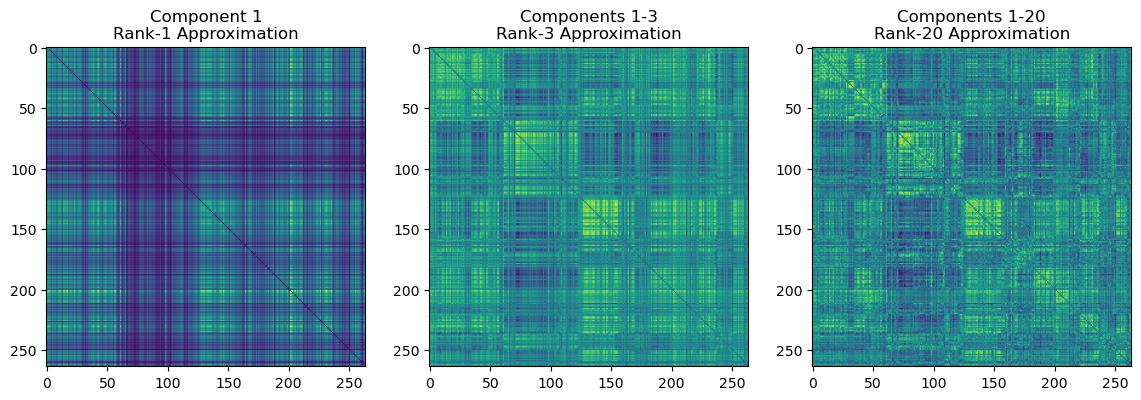

In [24]:
top1 = np.load('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/Top1/600009963128_task-emoidtop1_fc.npy')
top3 = np.load('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/Top3/600009963128_task-emoidtop3_fc.npy')
top20 = np.load('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/Top20/600009963128_task-emoidtop20_fc.npy')

fig, ax = plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(remap(vec2mat(top1)))
ax[1].imshow(remap(vec2mat(top3)))
ax[2].imshow(remap(vec2mat(top20)))

ax[0].set_title('Component 1\nRank-1 Approximation')
ax[1].set_title('Components 1-3\nRank-3 Approximation')
ax[2].set_title('Components 1-20\nRank-20 Approximation')

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/Components.pdf')